In [1]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

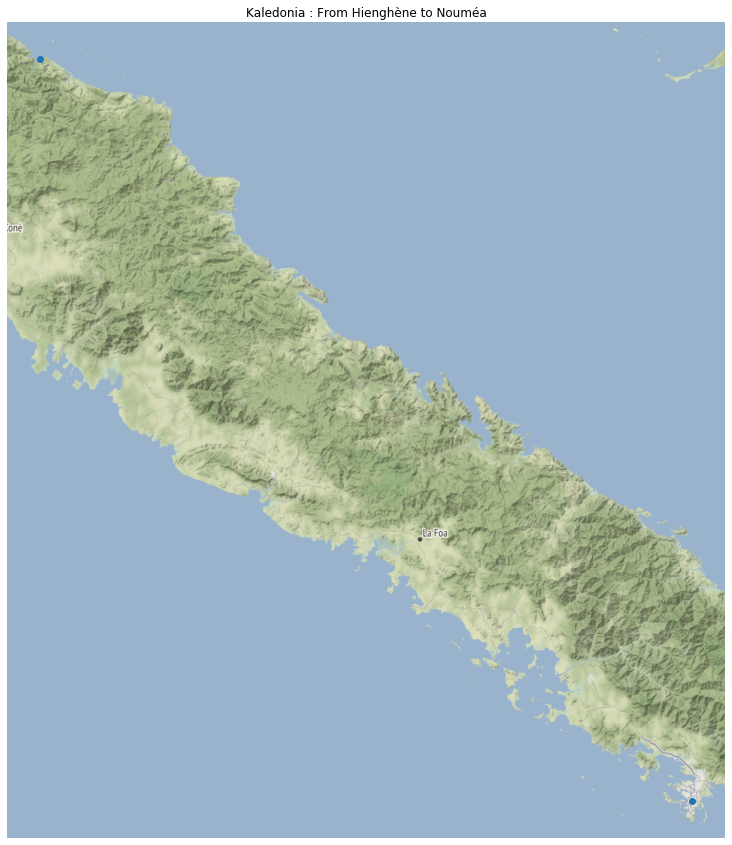

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Let's define our raw data, whose epsg is 4326
df = pd.DataFrame({
    'LAT'  :[-22.266415, -20.684157],
    'LONG' :[166.452764, 164.956089],
})
df['coords'] = list(zip(df.LONG, df.LAT))

# ... turn them into geodataframe, and convert our
# epsg into 3857, since web map tiles are typically
# provided as such.
geo_df = gpd.GeoDataFrame(
    df, crs  ={'init': 'epsg:4326'},
    geometry = df['coords'].apply(Point)
).to_crs(epsg=3857)

# ... and make the plot
ax = geo_df.plot(
    figsize= (15, 15),
    alpha  = 1
)
add_basemap(ax, zoom=10)
ax.set_axis_off()
plt.title('Kaledonia : From Hienghène to Nouméa')
plt.show()